In [9]:
# This is where the AI framework (PyTorch) is imported.
import torch 
# This is the neural network framework.
import torch.nn as nn
# This is the optimizer framework.
import torch.optim as optim

In [10]:
# These are some other helpful libraries that I imported.

# Numpy is a really useful Python math library.
import numpy as np
# Matplotlib is used to make graphs.
import matplotlib.pyplot as plt
# Random is used for random number generation. (We could use it for noise)
import random

# The "import as" means that you're importing the library and giving it whatever name you want.
# For example, I wrote "import numpy as np", meaning that I can reference the numpy library as "np" now.

In [11]:
# Here I created the data.

# np.arange() takes a start, end, step, and datatype (don't worry about that too much, I just used float32).
# np.arange() gives us an array (list) of all of the values between the start and the end, going one step at a time.
x_values = np.arange(1, 10, 0.1, np.float32)

# The y_values (outputs) are just the x_values (inputs) multiplied by 2. 
# You can put more stuff here, like noise using random.randragne.
y_values = 2 * x_values

# This is data that we'll use to train the actual model. PyTorch models take a specific type of input data called Tensors.
# Tensors are multi-dimensional arrays (it can represent all sorts of data, like single numbers or whole matrices).

# torch.from_numpy creates a Tensor from the provided array.
# reshape changes the dimensions of the tensor (-1 for the rows means don't change the number of rows, and 1 means put it in a single column).
x_train = torch.from_numpy(x_values).reshape(-1, 1)
y_train = torch.from_numpy(y_values).reshape(-1, 1)

In [12]:
# Here we create the Linear Regression model class. It inherits the nn.Module,.which is a fundamental building block for all of the neural network classes.
class LinearRegressionModel(nn.Module):
    # Init (short for initialize) is a function that determines what the class does when it is first created.
    # Self refers to the class object itself.
    def __init__(self):
        # Super.init() calls the parent class's init.
        super(LinearRegressionModel, self).__init__()
        # We use a linear transofrmation here, and we only have one input and one output. 
        self.linear = torch.nn.Linear(1, 1)

    # This defines the forward pass (how input data is processed through the layers to generate an output)
    # Here we just have a simple linear layer.
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [13]:
# We initialize the model here for use. This is an object that will be stored in memory.
model = LinearRegressionModel()

# Here I use the mean squared error (MSE) as the loss function
criterion = nn.MSELoss(reduction="mean")
# And stochastic gradient descent (SGD) is used as the optimizer
# LR specifies the learning rate of the model.
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [16]:
# This will store a list of our loss data so we can graph it later.
loss_data = []

# We loop through 500 training sessions (epochs) here.
for epoch in range(500):
    # We generate a prediction from our x_data.
    pred_y = model(x_train)

    # We compare the prediction to the known y_data and calculate its MSE.
    loss = criterion(pred_y, y_train)

    # Normally, the optimizer accumulates the gradient, but we don't want that. This is like zeroing a scale (resetting the gradient to zero).
    optimizer.zero_grad()
    # We backpropogate (go back through the layers to find the source of the loss.)
    loss.backward()
    # Then we apply what we learned in the backpropogation to update the model with new weights.
    optimizer.step()

    # Here we just append loss data for graphing later.
    loss_data.append(loss.item())

    # Every hundreth epoch (the % means modulo, it gives the remainder), we print out the loss to see how our model is doing.
    if epoch % 100 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

# We create a new test input.
new_var = torch.Tensor([[4.0]])
# We generate a prediction for the test input with our newly trained model.
pred_y = model(new_var)
# We display our prediction.
print("predict (after training): ", 4, "->", model(new_var).item())

epoch 0, loss 0.000630976865068078
epoch 100, loss 0.0003053966793231666
epoch 200, loss 0.00014781286881770939
epoch 300, loss 7.154453487601131e-05
epoch 400, loss 3.462921449681744e-05
predict (after training):  4 -> 8.003795623779297


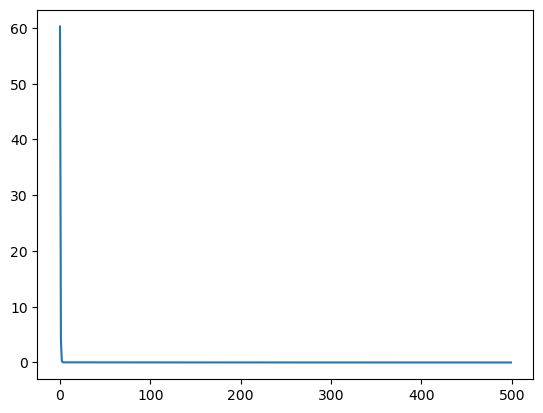

In [15]:
# Here we graph the loss data (should see a decreasing trend).
plt.plot(loss_data)